In [29]:
import numpy as np

In [30]:
dia_hebra = 0.27 # mm
# 
F_hebra = 3.241 # kg
F_hebra_kg = F_hebra
F_hebra = 9.81*F_hebra # N
A_hebra = np.pi*(dia_hebra/2)**2
sigma_hebra = F_hebra/A_hebra # MPa

F_trenzado = 172.667 # kg
F_trenzado_kg = F_trenzado
F_trenzado = 9.81*F_trenzado # N
dia_trenzado = 4 # mm

# 4 monofilamentos x 16 + 15 monofilamentos en alma
theta = 85 # grados
ctheta = np.sin(np.deg2rad(theta))
Nalma = 15
Atrenzado = (ctheta*16*4 + Nalma)*np.pi*(dia_hebra/2)**2 
sigma_trenzado = F_trenzado/Atrenzado # MPa

# homogenized 
Atrenzado_homogenized = np.pi*(dia_trenzado/2)**2
sigma_trenzado_homogenized = F_trenzado/Atrenzado_homogenized # MPa
# print with 2 decimals
print(f"sigma_trenzado = {sigma_trenzado:.2f} MPa")
print(f"sigma_hebra = {sigma_hebra:.2f} MPa")
print(f"sigma_trenzado_homogenized = {sigma_trenzado_homogenized:.2f} MPa")
# 
# ratio 
ratio = sigma_trenzado/sigma_hebra
print(f"ratio = {ratio:.3f}")

sigma_trenzado = 375.64 MPa
sigma_hebra = 555.30 MPa
sigma_trenzado_homogenized = 134.79 MPa
ratio = 0.676


In [31]:
from tools.step.runstep import runstep,address,lj
import os


In [32]:
import glob

In [33]:
files = glob.glob('output/*.json')

In [34]:
file = files[-4]

In [35]:
results = []
for file in files:

    try:
        id_sim = os.path.basename(file).replace('.json','')

        params_sim = lj(id_sim)
        params = lj(params_sim["dependencies"]["post_path"])

        steps = params["results"]["frd"]["steps"]
        step_str =  [ i[:7 ] for i in steps ]
        step_str = np.array(step_str)    
        step_str_uq = np.unique(step_str)

        indx = [ np.where(step_str == iuq )[-1][-1] for iuq in step_str_uq]


        sigma_max = [i["sigma_max"] for i in params["results"]["measurements"]]
        sigma_apl = [i["sigma"] for i in params["results"]["measurements"]]
        epsilon = [i["epsilon"] for i in params["results"]["measurements"]]
        Ftotal = [i["F_total"] for i in params["results"]["measurements"]]

        sigma_max = np.array(sigma_max)
        sigma_max = sigma_max[indx]
        sigma_apl = np.array(sigma_apl)
        sigma_apl = sigma_apl[indx]
        epsilon = np.array(epsilon)
        epsilon = epsilon[indx]
        Ftotal = np.array(Ftotal)/9.81 # kg
        Ftotal = Ftotal[indx]

        step_str_uq = step_str[indx]

        angle = 85
        ctheta = np.sin(np.deg2rad(angle))
        Ftotal_correrted = Ftotal*((64*ctheta+Nalma)/64*ctheta)

        results.append({"id_sim":id_sim,
                        "Ftotal_correrted":Ftotal_correrted,
                        "step_str_uq":step_str_uq,"sigma_max":sigma_max,"sigma_apl":sigma_apl,"epsilon":epsilon,"Ftotal":Ftotal})

    except Exception as e:
        print(e)
        print(file)
        pass


Simulation not found
output\2024-08-30__08-55-14__69218.json
Simulation not found
output\2024-08-30__09-08-30__98506.json
Simulation not found
output\2024-08-31__08-23-50__65026.json
Simulation not found
output\2024-08-31__17-02-56__96293.json
Simulation not found
output\2024-09-01__15-54-14__96293.json


In [36]:
from matplotlib import pyplot as plt
import numpy as np

In [37]:
len(results)

4

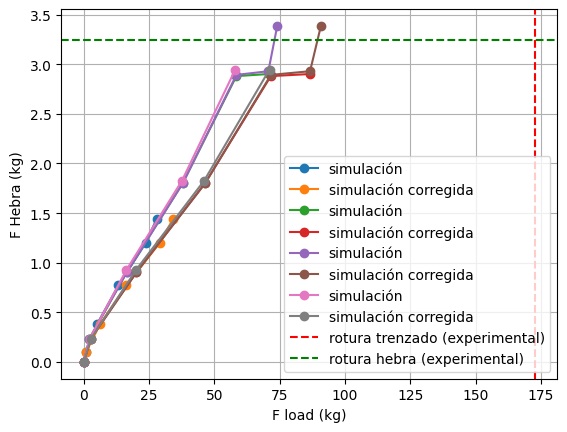

In [39]:
# linear regression

# sigma_max = a*sigma_apl + b
from scipy.stats import linregress

for r in results:

    id_sim = r["id_sim"]
    Ftotal_correrted = r["Ftotal_correrted"]
    step_str_uq = r["step_str_uq"]
    sigma_max = r["sigma_max"]
    sigma_apl = r["sigma_apl"]
    epsilon = r["epsilon"]
    Ftotal = r["Ftotal"]

    slope, intercept, r_value, p_value, std_err = linregress(sigma_apl,sigma_max)
    # linear regression
    sigma_apl_fit = np.linspace(0,500,100)
    sigma_max_fit = intercept + slope*sigma_apl_fit
    # plt.plot(sigma_apl_fit,sigma_max_fit,label="fit",marker="none")

    Fmax =  sigma_max*A_hebra/9.81
    # plt.plot(Ftotal,Fmax,label="simulación",marker="o")
    label = f"{id_sim}"
    plt.plot(Ftotal_correrted,Fmax,label=label,marker="o")
    #horizontal line
plt.axvline(x=F_trenzado_kg, color='r', linestyle='--',label="rotura trenzado (experimental)")
#homogenized
# plt.axvline(x=sigma_trenzado_homogenized, color='b', linestyle='--',label="rotura trenzado (homogenized)")
#horizontal line
plt.axhline(y=F_hebra_kg, color='g', linestyle='--',label="rotura hebra (experimental)")
#
plt.ylabel("F Hebra (kg)")
plt.xlabel("F load (kg)")
plt.grid()
plt.legend()

In [ ]:
Nalma

15